[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DavideDaz/TokyoDataScience/blob/master/Assignments/Gradient%20Descent%20Assignment/Basis%20Neural%20Network%20-%20Quadratic%20-%20SGD%20with%20momentum.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
observations = 100 # m

x_i =np.random.uniform(low=0, high=10, size=(observations,1))
x_i = np.sort(x_i, axis=0)

In [3]:
noise = np.random.uniform(-50,50,(observations,1))
alfa_true = 2
beta_true = 3
gamma_true = 8
targets = alfa_true + x_i*beta_true + gamma_true*x_i*x_i + noise 

## Gradient Descent Solution:


In [4]:
init_range = 0.1

beta_gd,alfa_gd,gamma_gd = 0.10416243,0.17923125,0.12899188

beta_momentum,alfa_momentum,gamma_momentum = 0.10416243,0.17923125,0.12899188

beta_momentum99,alfa_momentum99,gamma_momentum99 = 0.10416243,0.17923125,0.12899188

loss_SGD, loss_SGD_momentum, loss_SGD_momentum99 = [],[],[]

learning_rate = 0.0005

#Initial velocities momentum = 0.9
alpha_friction = 0.9
v_alpha,v_beta,v_gamma = 0.05,0.05,0.05

#Initial velocities momentum = 0.99
alpha_friction99 = 0.99
v_alpha99,v_beta99,v_gamma99 = 0.05,0.05,0.05

#Store velocities values momentum = 0.9
list_alfa, list_beta, list_gamma = [],[],[]

#Store velocities values momentum = 0.99
list_alfa99, list_beta99, list_gamma99 = [],[],[]

In [5]:
for i in range(1000):
    
    #SGD
    outputs = (x_i*x_i*gamma_gd) + (x_i*beta_gd) + alfa_gd
    deltas = outputs - targets
    
    loss = sum(deltas**2)/2/observations
    loss_SGD.append(loss)
    
    deltas_scaled = deltas/ observations
    
    gamma_gd = gamma_gd - learning_rate * np.dot((x_i*x_i).T,deltas_scaled)
    beta_gd = beta_gd - learning_rate * np.dot(x_i.T,deltas_scaled)
    alfa_gd = alfa_gd - learning_rate * np.sum(deltas_scaled)
    
    #SGD momentum 0.9
    
    outputs_m = (x_i*x_i*gamma_momentum) + (x_i*beta_momentum) + alfa_momentum
    deltas_m = outputs_m - targets
    
    loss_m = sum(deltas_m**2)/2/observations
    loss_SGD_momentum.append(loss_m)
    
    deltas_scaled_m = deltas_m/ observations
    
    g_alpha = learning_rate * np.sum(deltas_scaled_m)
    g_beta = learning_rate * np.dot(x_i.T,deltas_scaled_m)
    g_gamma = learning_rate * np.dot((x_i*x_i).T,deltas_scaled_m)
    
    v_alpha = v_alpha*alpha_friction - learning_rate * np.sum(deltas_scaled_m)
    v_beta = v_beta*alpha_friction - learning_rate * np.dot(x_i.T,deltas_scaled_m)
    v_gamma = v_gamma*alpha_friction - learning_rate * np.dot((x_i*x_i).T,deltas_scaled_m)
    
    
    gamma_momentum += v_gamma
    beta_momentum += v_beta
    alfa_momentum += v_alpha
    
    list_alfa.append(v_alpha)
    list_beta.append(float(v_beta))
    list_gamma.append(float(v_gamma))
    
    #SGD momentum 0.99
    
    outputs_m99 = (x_i*x_i*gamma_momentum99) + (x_i*beta_momentum99) + alfa_momentum99
    deltas_m99 = outputs_m99 - targets
    
    loss_m99 = sum(deltas_m99**2)/2/observations
    loss_SGD_momentum99.append(loss_m99)
    
    deltas_scaled_m99 = deltas_m99/ observations
    
    v_alpha99 = v_alpha99*alpha_friction99 - learning_rate * np.sum(deltas_scaled_m99)
    v_beta99 = v_beta99*alpha_friction99 - learning_rate * np.dot(x_i.T,deltas_scaled_m99)
    v_gamma99 = v_gamma99*alpha_friction99 - learning_rate * np.dot((x_i*x_i).T,deltas_scaled_m99)
    
    
    gamma_momentum99 += v_gamma99
    beta_momentum99 += v_beta99
    alfa_momentum99 += v_alpha99
    
    list_alfa99.append(v_alpha99)
    list_beta99.append(float(v_beta99))
    list_gamma99.append(float(v_gamma99))    

In [6]:
print(alfa_gd,beta_gd, gamma_gd)
print(alfa_momentum,beta_momentum, gamma_momentum)
print(alfa_momentum99,beta_momentum99, gamma_momentum99)

1.2945159080479705 [[3.06793239]] [[7.92278292]]
2.9101486485854617 [[3.33700833]] [[7.86193131]]
4.972676867877603 [[2.51214915]] [[7.89730901]]


In [7]:
y_GD = alfa_gd + beta_gd*x_i + gamma_gd*x_i*x_i
y_momentum = alfa_momentum + beta_momentum*x_i + gamma_momentum*x_i*x_i
y_momentum99 = alfa_momentum99 + beta_momentum99*x_i + gamma_momentum99*x_i*x_i

Text(0, 0.5, 'y')

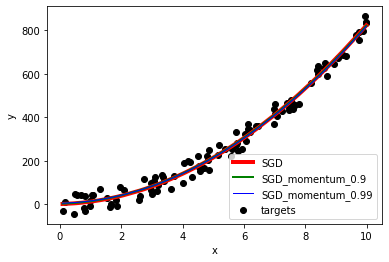

In [8]:
%matplotlib inline
plt.scatter(x_i, targets, marker='o', color='black' )
plt.plot(x_i,y_GD, color='red',linewidth=4)
plt.plot(x_i,y_momentum, color='green',linewidth=2)
plt.plot(x_i,y_momentum99, color='blue',linewidth=1)
plt.legend(( 'SGD','SGD_momentum_0.9','SGD_momentum_0.99','targets'),loc='lower right')
plt.xlabel('x')
plt.ylabel('y')

## SGD With Momentum

Text(0, 0.5, 'Loss')

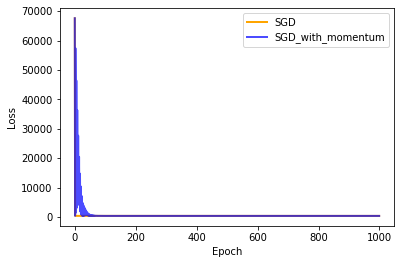

In [30]:
%matplotlib inline
plt.plot(range(0,len(loss_SGD)),loss_SGD, color='orange',linewidth=2)
plt.plot(range(0,len(loss_SGD_momentum)),loss_SGD_momentum, color='blue',linewidth=2,alpha=0.7)
plt.legend(( 'SGD','SGD_with_momentum','SGD_with_momentum_0.99'),loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

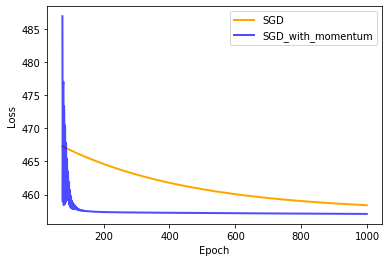

In [29]:
%matplotlib inline
frame1 = loss_SGD[75:1000]
frame2 = loss_SGD_momentum[75:1000]

plt.plot(range(75,1000),frame1, color='orange',linewidth=2)
plt.plot(range(75,1000),frame2, color='blue',linewidth=2,alpha=0.7)
plt.legend(( 'SGD','SGD_with_momentum'),loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'v term')

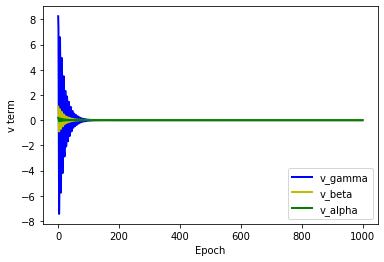

In [11]:
%matplotlib inline
plt.plot(range(len(list_gamma)),list_gamma, color='b',linewidth=2)
plt.plot(range(len(list_beta)),list_beta, color='y',linewidth=2)
plt.plot(range(len(list_alfa)),list_alfa, color='g',linewidth=2)
plt.legend(( 'v_gamma','v_beta','v_alpha'),loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('v term')

Text(0, 0.5, 'v term')

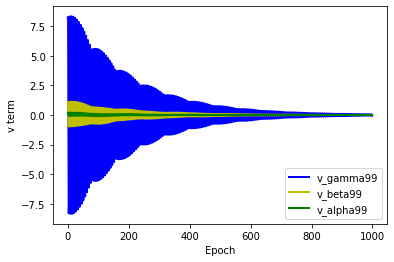

In [12]:
%matplotlib inline
plt.plot(range(len(list_gamma99)),list_gamma99, color='b',linewidth=2)
plt.plot(range(len(list_beta99)),list_beta99, color='y',linewidth=2)
plt.plot(range(len(list_alfa99)),list_alfa99, color='g',linewidth=2)
plt.legend(( 'v_gamma99','v_beta99','v_alpha99'),loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('v term')

Text(0, 0.5, 'Loss')

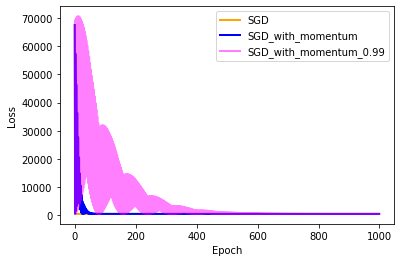

In [25]:
%matplotlib inline
plt.plot(range(0,len(loss_SGD)),loss_SGD, color='orange',linewidth=2)
plt.plot(range(0,len(loss_SGD_momentum)),loss_SGD_momentum, color='blue',linewidth=2)
plt.plot(range(0,len(loss_SGD_momentum99)),loss_SGD_momentum99, color='magenta',linewidth=2, alpha=0.5)
plt.legend(( 'SGD','SGD_with_momentum','SGD_with_momentum_0.99'),loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

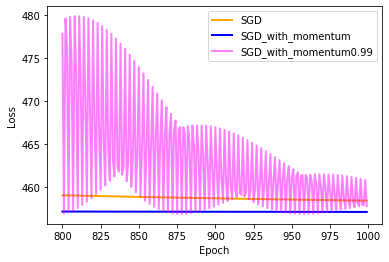

In [26]:
%matplotlib inline
frame1 = loss_SGD[800:1001]
frame2 = loss_SGD_momentum[800:1001]
frame3 = loss_SGD_momentum99[800:1001]

plt.plot(range(800,1000),frame1, color='orange',linewidth=2)
plt.plot(range(800,1000),frame2, color='blue',linewidth=2)
plt.plot(range(800,1000),frame3, color='magenta',linewidth=2,alpha=0.5)
plt.legend(( 'SGD','SGD_with_momentum','SGD_with_momentum0.99'),loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [15]:
beta_momentum99 = 0.10416243
alfa_momentum99 = 0.17923125
gamma_momentum99 = 0.12899188



alpha_momentum99 = 0.9
v_alpha = 0.05
v_beta = 0.05
v_gamma =0.05

list_a99_1 =[]
list_b99_1 = []
list_c99_1 =[]

loss_SGD_momentum99_1 = []

for i in range(1000):
    if i<=200:
        alpha_friction99 = 0.9
    else:
        alpha_friction99 = 0.99
        
    outputs = (x_i*x_i*gamma_momentum99) + (x_i*beta_momentum99) + alfa_momentum99
    deltas = outputs - targets
    
    loss = sum(deltas**2)/2/observations
    loss_SGD_momentum99_1.append(loss)
    
    
    deltas_scaled = deltas/ observations
    
    v_alpha = v_alpha*alpha_friction99 - learning_rate * np.sum(deltas_scaled)
    v_beta = v_beta*alpha_friction99 - learning_rate * np.dot(x_i.T,deltas_scaled)
    v_gamma = v_gamma*alpha_friction99 - learning_rate * np.dot((x_i*x_i).T,deltas_scaled)
    
    
    gamma_momentum99 = gamma_momentum99 + v_gamma
    beta_momentum99 = beta_momentum99 + v_beta
    alfa_momentum99 = alfa_momentum99 + v_alpha
    
    list_a99_1.append(v_alpha)
    list_b99_1.append(float(v_beta))
    list_c99_1.append(float(v_gamma))

Text(0, 0.5, 'Loss')

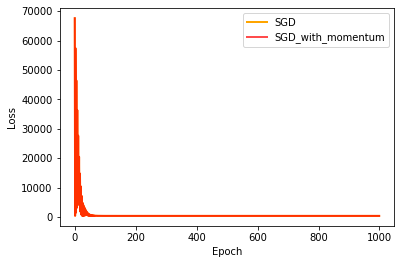

In [32]:
%matplotlib inline
plt.plot(range(0,len(loss_SGD_momentum)),loss_SGD_momentum, color='orange',linewidth=2)
plt.plot(range(0,len(loss_SGD_momentum99_1)),loss_SGD_momentum99_1, color='red',linewidth=2,alpha=0.7)
plt.legend(( 'SGD','SGD_with_momentum','SGD_with_momentum_0.99'),loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

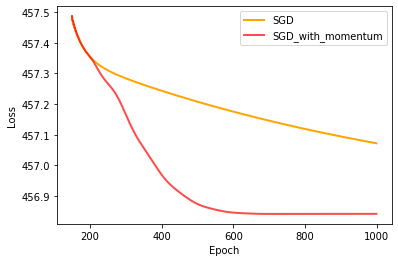

In [34]:
%matplotlib inline
frame1 = loss_SGD_momentum[150:1000]
frame2 = loss_SGD_momentum99_1[150:1000]
plt.plot(range(150,1000),frame1, color='orange',linewidth=2)
plt.plot(range(150,1000),frame2, color='red',linewidth=2,alpha=0.7)
plt.legend(( 'SGD','SGD_with_momentum','SGD_with_momentum0.99'),loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')